This project is about giving exposure about Machine learning, its usage, Cloud services and why they are helpful in analyzing Big Data.

In this Project, we are trying to analyze the crime data. This data is taken from <a href=https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2/data> here </a>. You have to download data from here, it should be around 1.6 GB in size. You will predict the type of crime that can happen given the features.

# Task 1 - Read the data and filter the data you need

This is open ended, you can use any features you want and drop any one of them. The 'Primary Type' is our target variable which we will be predicting for.

This task is split into multiple parts:


1.   Print the Histogram of variable 'Primary Type'. The x-axis should be each primary type, and the y-axis will be the count of each Primary type.
2. Sort the histogram in decreasing order. This will help you to understand which Primary Type of crime occured more than the rest. 
3. Now, 'K' is the total number of classes in Primary Type. Experiment with K=2,3,4,5 as the most popular Primary Type data to be used and predicted. 
    4.  For a given K, filter the dataset to extract the most popular K Primary Types and report what percentage of the total dataset this amounts to. Lets call this percentage, F. Now, find what fraction of this filtered data can be supported in your analysis on your local machine. Lets call this P. For example, of the approximately 7 million entries, say for K=3, we find that the top three types of crime add up to around 3.5 million, which makes F be 50%. Now see if your machine can handle all 3.5 million entries in you ML analysis. Say you find out that you can only handle 60% of this, which means your working dataset will be 2.1 million entries.  
5.  For each K=2,3,4,5 (and associated percentage 'P'), you should train a model and report the accuracy. (Refer to other tasks)

Hint: Split the data into training and testing in the ratio of 80:20.

In [1]:
# Load libraries and data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams['figure.dpi'] = 300
df_crime = pd.read_csv('Crimes_-_2001_to_Present.csv')
df_crime.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"


In [2]:
df_crime.tail()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
7409404,12493745,JE387389,09/24/2021 03:50:00 PM,074XX W TALCOTT AVE,1513,PROSTITUTION,SOLICITING FOR BUSINESS,HOSPITAL BUILDING / GROUNDS,False,False,...,41.0,10.0,16,1125716.0,1938903.0,2021,10/01/2021 04:51:37 PM,41.988703,-87.812972,"(41.988702804, -87.81297224)"
7409405,12493068,JE386506,09/24/2021 10:00:00 AM,006XX E 131ST ST,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,9.0,54.0,07,1182890.0,1818558.0,2021,10/01/2021 04:51:37 PM,41.657322,-87.606425,"(41.657321724, -87.606425363)"
7409406,12497289,JE391669,09/18/2021 04:30:00 AM,016XX N LA SALLE DR,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,SIDEWALK,False,False,...,2.0,7.0,11,1174829.0,1911305.0,2021,10/01/2021 04:49:13 PM,41.912012,-87.633158,"(41.912012179, -87.633158199)"
7409407,12492677,JE385917,09/24/2021 04:13:00 PM,031XX N LAWNDALE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,30.0,21.0,08B,1151215.0,1920671.0,2021,10/01/2021 04:51:37 PM,41.938210,-87.719663,"(41.938209503, -87.719663144)"
7409408,12492283,JE385572,09/24/2021 11:30:00 AM,113XX S FRONT AVE,0820,THEFT,$500 AND UNDER,STREET,False,False,...,9.0,49.0,06,1181306.0,1829789.0,2021,10/01/2021 04:51:37 PM,41.688178,-87.611877,"(41.688177753, -87.611877375)"


In [3]:
total_rows = len(df_crime)
total_rows

7409409

Text(0, 0.5, 'Count')

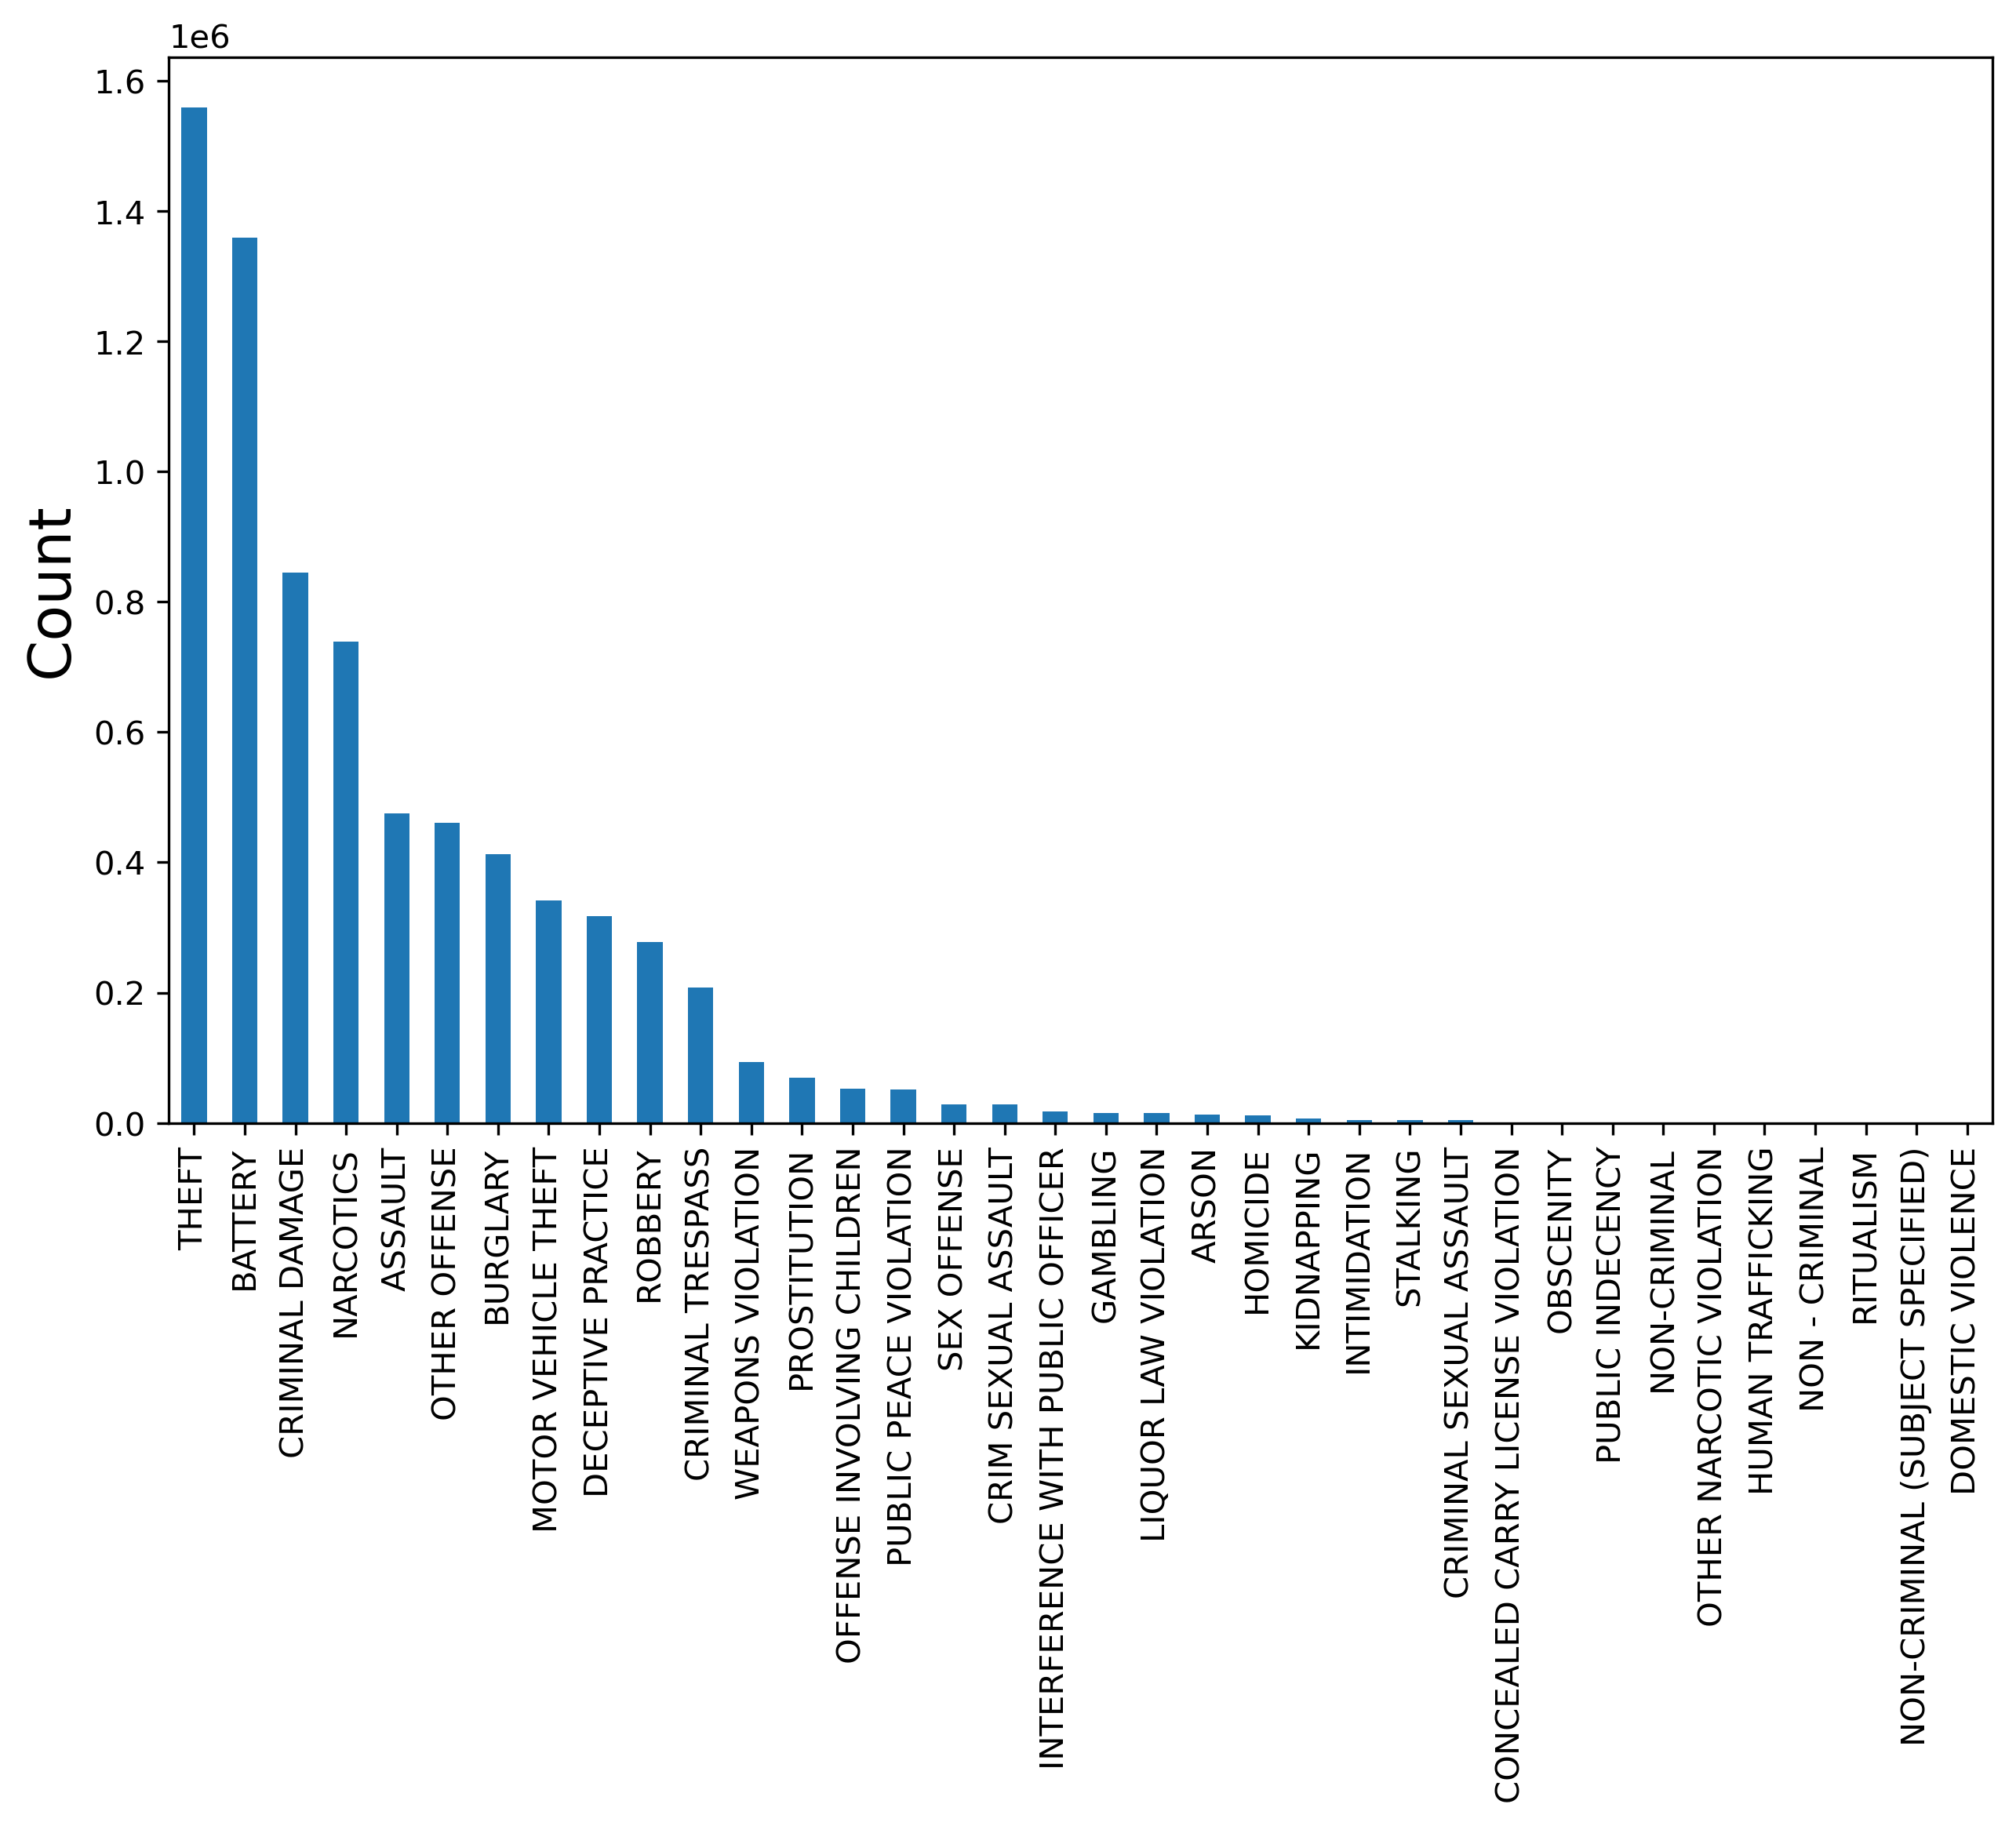

In [4]:
# 1. Print the Histogram of variable 'Primary Type'. 
# The x-axis should be each primary type, and the y-axis will be the count of each Primary type.
df_crime['Primary Type'].value_counts().plot(kind = 'bar')
plt.ylabel('Count', fontsize=18)

Text(0, 0.5, 'Count')

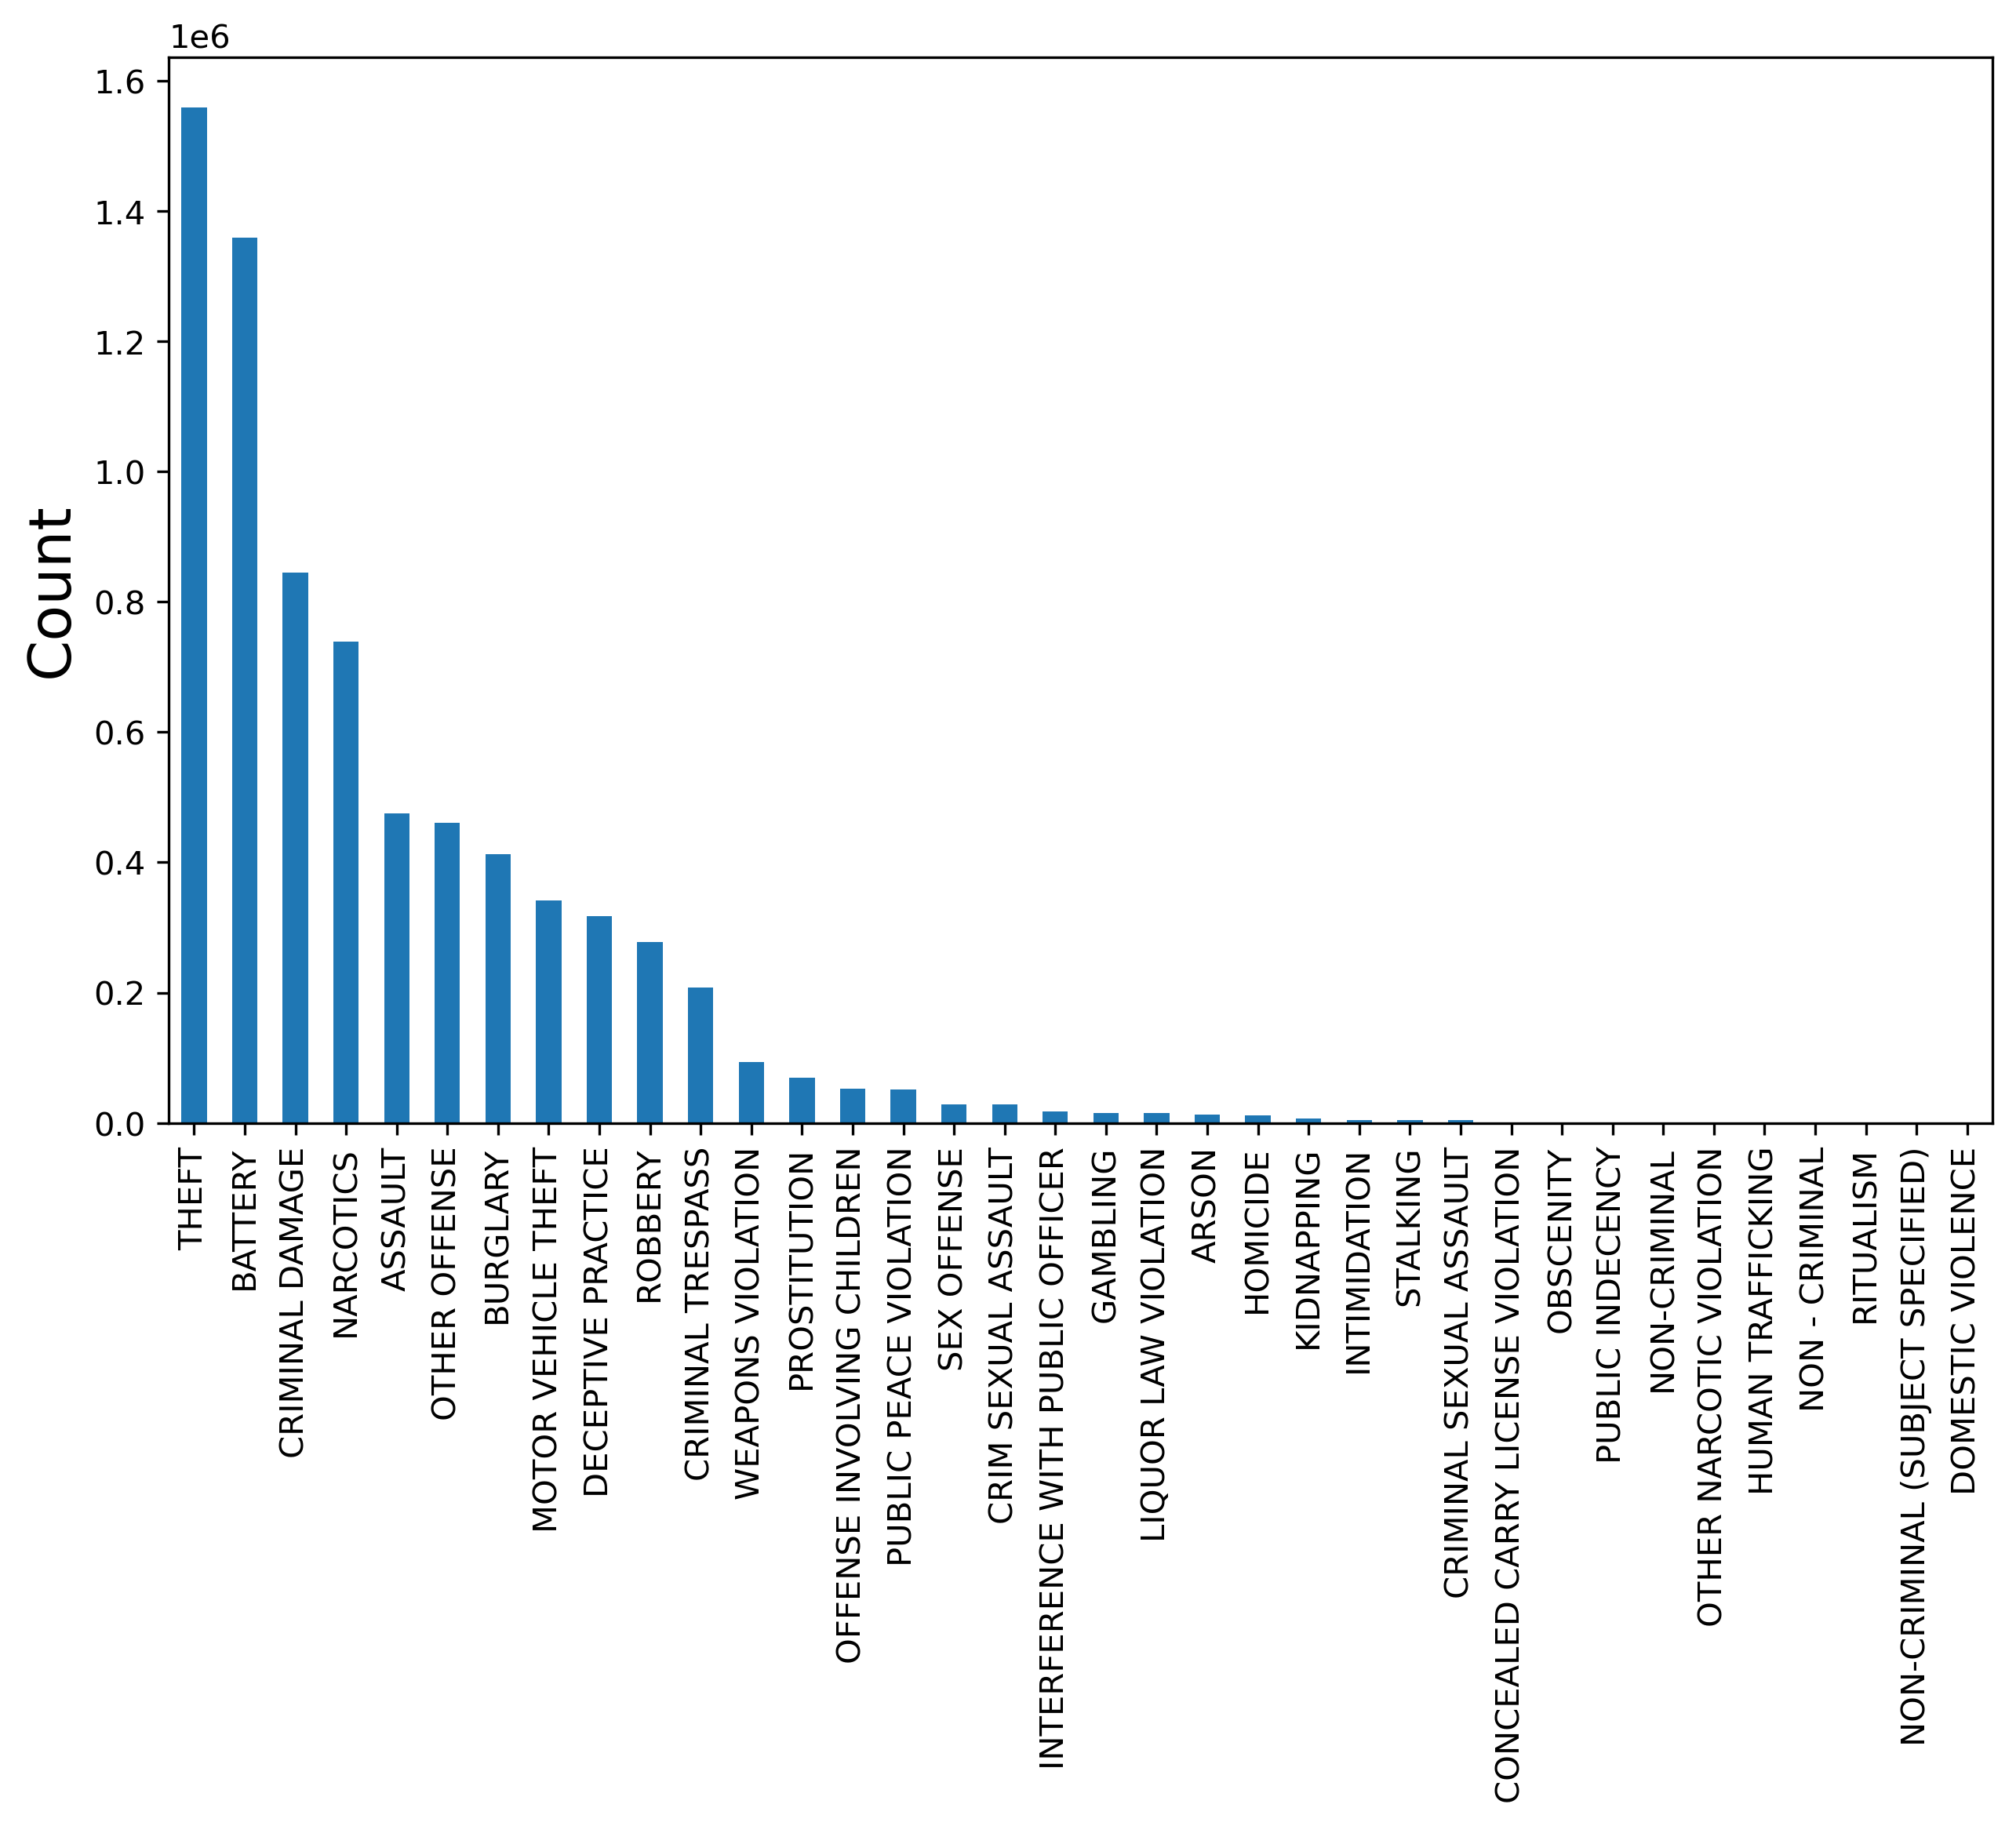

In [5]:
# 2. Sort the histogram in decreasing order. This will help you to understand 
# which Primary Type of crime occured more than the rest.
df_crime['Primary Type'].value_counts().plot(kind = 'bar')
plt.ylabel('Count', fontsize=18)

In [6]:
# 3. Now, 'K' is the total number of classes in Primary Type. 
# Experiment with K=2,3,4,5 as the most popular Primary Type data to be used and predicted.
# For a given K, filter the dataset to extract the most popular K Primary Types and report 
# what percentage of the total dataset this amounts to. Lets call this percentage, F. 
# Now, find what fraction of this filtered data can be supported in your analysis on your 
# local machine. Lets call this P. 
'''
For example, of the approximately 7 million entries, say for K=3, we find that the top three 
types of crime add up to around 3.5 million, which makes F be 50%. Now see if your machine 
can handle all 3.5 million entries in you ML analysis. Say you find out that you can only 
handle 60% of this, which means your working dataset will be 2.1 million entries.
'''

'\nFor example, of the approximately 7 million entries, say for K=3, we find that the top three \ntypes of crime add up to around 3.5 million, which makes F be 50%. Now see if your machine \ncan handle all 3.5 million entries in you ML analysis. Say you find out that you can only \nhandle 60% of this, which means your working dataset will be 2.1 million entries.\n'

In [7]:
# Find top 5 primary type of crimes
t5_types = df_crime['Primary Type'].value_counts().index.tolist()[:5]
print(t5_types)

# Find missing data columns and fill in missing data
df_crime_get = df_crime.copy()

# Work with only top 5 primary types
df_crime_get = df_crime_get.loc[df_crime_get['Primary Type'].isin(t5_types)] 

# Define features interested for fitting the model
interests = ['Primary Type','IUCR','Arrest','Domestic','Beat','District','Community Area','FBI Code', 'Ward']
df_crime_get = df_crime_get[interests]
df_crime_get.isna().sum() 
# District, Community Area, Ward have NaNs 

['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT']


Primary Type           0
IUCR                   0
Arrest                 0
Domestic               0
Beat                   0
District              19
Community Area    419135
FBI Code               0
Ward              419861
dtype: int64

In [8]:
# Drop rows with NaN values and check all are dropped
df_crime_get = df_crime_get.dropna()
df_crime_get.isna().sum() 

Primary Type      0
IUCR              0
Arrest            0
Domestic          0
Beat              0
District          0
Community Area    0
FBI Code          0
Ward              0
dtype: int64

In [9]:
K = list(range(2,6))
filter_data = [] # store filtered dataframe of the various primary types k
F = [] # store percentage of filtered dataframe with k

for k in K:
    types = t5_types[:k] # prints k categories of top occurrences
    print('Top ', k, 'most popular primary type', types)    
    filtered = df_crime_get.loc[df_crime_get['Primary Type'].isin(types)]
    print('Shape of this filtered dataset: ', filtered.shape)
    f = filtered.shape[0]/total_rows * 100
    F.append(f)
    print(f, "% of total dataset\n") # percentage of data of the above mentioned categories
    filter_data.append(filtered)   
f2, f3, f4, f5 = [filter_data[k-2] for k in K]

Top  2 most popular primary type ['THEFT', 'BATTERY']
Shape of this filtered dataset:  (2676186, 9)
36.11875117165215 % of total dataset

Top  3 most popular primary type ['THEFT', 'BATTERY', 'CRIMINAL DAMAGE']
Shape of this filtered dataset:  (3449248, 9)
46.552268878664954 % of total dataset

Top  4 most popular primary type ['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS']
Shape of this filtered dataset:  (4121057, 9)
55.61924034696965 % of total dataset

Top  5 most popular primary type ['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT']
Shape of this filtered dataset:  (4555883, 9)
61.48780557261719 % of total dataset



# Task 2 - Convert the features in a form that can be given as input to scikit library/functions


<b>Method Explanation: </b>
Our goal is to use multi-class logistic regression to predict the primary type of the crime.
So we will standardize the dataset and use PCA to fit into our model. 
In terms of standardizing, we will turn non-numeric/ categorical data into numerical values. This will allow machines to standardize and fit our datasets better. 

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
# Take a look at the model
df_crime_get.head(5)

,Primary Type,IUCR,Arrest,Domestic,Beat,District,Community Area,FBI Code,Ward
0,BATTERY,0486,False,True,924,9.0,61.0,08B,12.0
1,THEFT,0870,False,False,1511,15.0,25.0,06,29.0
2,THEFT,0810,False,True,631,6.0,44.0,06,8.0
3,NARCOTICS,2023,True,False,1412,14.0,21.0,18,35.0
4,ASSAULT,0560,False,True,1522,15.0,25.0,08A,28.0


In [12]:
# Examine the data types and only label encode the non-numerical features
df_crime_get.dtypes

Primary Type       object
IUCR               object
Arrest               bool
Domestic             bool
Beat                int64
District          float64
Community Area    float64
FBI Code           object
Ward              float64
dtype: object

In [13]:
nn_features = ['Primary Type', 'IUCR', 'Arrest', 'Domestic', 'FBI Code'] # non-numeric features
nn_idx_features = [0,1,2,3,7] # these are the corresponding column indices
data_k = [f2, f3, f4, f5]
for dk in data_k:
    for feature in nn_idx_features:
        le = LabelEncoder()
        dk.iloc[:,feature] = le.fit_transform(dk.iloc[:,feature])

In [14]:
# Take a look at f5 for example after being label encoded
f5.head()

,Primary Type,IUCR,Arrest,Domestic,Beat,District,Community Area,FBI Code,Ward
0,1,21,0,1,924,9.0,61.0,4,12.0
1,4,55,0,0,1511,15.0,25.0,2,29.0
2,4,45,0,1,631,6.0,44.0,2,8.0
3,3,87,1,0,1412,14.0,21.0,6,35.0
4,0,44,0,1,1522,15.0,25.0,3,28.0


# Task 3 - Build the model

Once the features are converted to the form accepted by scikit library, you have to build a machine learning model. Given the features predict the type of crime. 
Report the accuracy, F1, Precision and Recall of the model.

In [15]:
from sklearn.model_selection import train_test_split
def split(X, y):
    '''
    Split the data into training and testing in the ratio of 80:20.
    '''
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
    return X_train, X_test, y_train, y_test

In [16]:
from sklearn.metrics import precision_score, recall_score, f1_score
def print_stats(X_test, y_test, y_pred):
    print('Test Accuracy: %.5f' % pipe_lr.score(X_test, y_test))
    print('F1: %.5f' % f1_score(y_true=y_test, y_pred=y_pred, average='weighted'))
    print('Precision: %.5f' % precision_score(y_true=y_test, y_pred=y_pred, average='weighted'))
    print('Recall: %.5f' % recall_score(y_true=y_test, y_pred=y_pred, average='weighted'))

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Here goes the Pipeline
pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA(n_components=2)),
                    ('clf', LogisticRegression(random_state=1,solver='lbfgs',multi_class='multinomial'))])

In [18]:
def fit_model(train, test):
    start = time.time()
    X_train, X_test, y_train, y_test = split(train, test)
    pipe_lr.fit(X_train, y_train)
    y_pred = pipe_lr.predict(X_test)
    print_stats(X_test, y_test, y_pred)
    end = time.time()
    print('Time elapsed in minutes: ', round((end - start)/60, 2))

In [19]:
startmd = time.time()
# K=2
'''
f2xn, f2xt, f2yn, f2yt = split(f2.iloc[:, 1:], f2.iloc[:, 0])
pipe_lr.fit(f2xn, f2yn)
f2yp = pipe_lr.predict(f2xt)
print_stats(f2xt, f2yt, f2yp)
'''
print('Top 2 Most Popular Primary Types')
fit_model(f2.iloc[:, 1:], f2.iloc[:, 0])

# K=3
print('\nTop 3 Most Popular Primary Types')
fit_model(f3.iloc[:, 1:], f3.iloc[:, 0])

# K=4
print('\nTop 4 Most Popular Primary Types')
fit_model(f4.iloc[:, 1:], f4.iloc[:, 0])

# K=5
print('\nTop 5 Most Popular Primary Types')
fit_model(f5.iloc[:, 1:], f5.iloc[:, 0])

endmd = time.time()
print('Time elapsed to fit models in minutes: ', round((endmd - startmd)/60, 2))

Top 2 Most Popular Primary Types
Test Accuracy: 0.92824
F1: 0.92789
Precision: 0.93092
Recall: 0.92824
Time elapsed in minutes:  0.17

Top 3 Most Popular Primary Types
Test Accuracy: 0.92210
F1: 0.92227
Precision: 0.92442
Recall: 0.92210
Time elapsed in minutes:  0.47

Top 4 Most Popular Primary Types
Test Accuracy: 0.75306
F1: 0.75038
Precision: 0.74990
Recall: 0.75306
Time elapsed in minutes:  1.07

Top 5 Most Popular Primary Types
Test Accuracy: 0.71606
F1: 0.68119
Precision: 0.65336
Recall: 0.71606
Time elapsed in minutes:  1.36
Time elapsed to fit models in minutes:  3.09


# Task 4 - Run K-fold cross validation and report the accuracy for a cv = 5. 
Report the total amount of time taken to run it on your laptop and AWS

In [20]:
from sklearn.model_selection import StratifiedKFold

def cv5(X, y):
    X_train, X_test, y_train, y_test = split(X, y)
    start = time.time()
    # Create a Stratified K-Fold; 
    kfold = StratifiedKFold(n_splits=5,random_state=0).split(X_train, y_train)
    ##alternatively you can try a standard K-Fold like so:
    # from sklearn.model_selection import KFold
    # kfold = KFold(n_splits=10,
    #                            random_state=1).split(X_train, y_train)
    scores = []
    for k, (train, test) in enumerate(kfold):
        pipe_lr.fit(X_train.iloc[train], y_train.iloc[train])
        score = pipe_lr.score(X_train.iloc[test], y_train.iloc[test]) # validation set
        scores.append(score)
        print('Fold: %s, Class dist.: %s, Acc: %.3f' % (k+1,
              np.bincount(y_train.iloc[train]), score))

    print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))
    end = time.time()
    print('Time elapsed in minutes: ', round((end - start)/60, 2))

In [21]:
startcv = time.time()
# K=2
print('Top 2 Most Popular Primary Types')
cv5(f2.iloc[:, 1:], f2.iloc[:, 0])

# K=3
print('\nTop 3 Most Popular Primary Types')
cv5(f3.iloc[:, 1:], f3.iloc[:, 0])

# K=4
print('\nTop 4 Most Popular Primary Types')
cv5(f4.iloc[:, 1:], f4.iloc[:, 0])

# K=5
print('\nTop 5 Most Popular Primary Types')
cv5(f5.iloc[:, 1:], f5.iloc[:, 0])

endcv = time.time()
print('Time elapsed to run K-fold CV in minutes: ', round((endcv - startcv)/60, 2))

Top 2 Most Popular Primary Types
Fold: 1, Class dist.: [793826 918932], Acc: 0.928
Fold: 2, Class dist.: [793826 918932], Acc: 0.928
Fold: 3, Class dist.: [793826 918932], Acc: 0.929
Fold: 4, Class dist.: [793827 918932], Acc: 0.928
Fold: 5, Class dist.: [793827 918932], Acc: 0.929

CV accuracy: 0.928 +/- 0.000
Time elapsed in minutes:  0.62

Top 3 Most Popular Primary Types
Fold: 1, Class dist.: [793838 494732 918948], Acc: 0.922
Fold: 2, Class dist.: [793838 494732 918948], Acc: 0.921
Fold: 3, Class dist.: [793838 494732 918948], Acc: 0.921
Fold: 4, Class dist.: [793839 494732 918948], Acc: 0.921
Fold: 5, Class dist.: [793839 494732 918948], Acc: 0.922

CV accuracy: 0.921 +/- 0.000
Time elapsed in minutes:  1.89

Top 4 Most Popular Primary Types
Fold: 1, Class dist.: [793952 494787 429772 918965], Acc: 0.753
Fold: 2, Class dist.: [793952 494787 429771 918966], Acc: 0.753
Fold: 3, Class dist.: [793952 494787 429771 918966], Acc: 0.753
Fold: 4, Class dist.: [793952 494787 429771 918966

#### First, the fitting output:
Top 2 Most Popular Primary Types
>Time elapsed in minutes:  0.23

Top 3 Most Popular Primary Types
>Time elapsed in minutes:  0.7

Top 4 Most Popular Primary Types
>Time elapsed in minutes:  1.54

Top 5 Most Popular Primary Types
>Time elapsed in minutes:  1.96

Time elapsed to fit models in minutes:  4.44


#### Then, the K-Fold output:
Top 2 Most Popular Primary Types
>Time elapsed in minutes:  0.86

Top 3 Most Popular Primary Types
>Time elapsed in minutes:  2.82

Top 4 Most Popular Primary Types
>Time elapsed in minutes:  6.0

Top 5 Most Popular Primary Types
>Time elapsed in minutes:  8.39

Time elapsed to run K-fold CV in minutes:  18.17